In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# UTILITY FUNCTION

This function plots a difference decision boundary

In [34]:
colors = 'ryb'
step = 0.02

def decision_boundary(x,y,model,iris,two = None):
  xMin, xMax = x[:,0].min()-1, x[:,0].max()+1
  yMin, yMax = x[:,1].min()-1, x[:,1].max()+1
  xx,yy = np.meshgrid(
      np.arange(xMin, xMax, step),
      np.arange(yMin, yMax, step)
  )
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  cs = plt.contourf(xx,yy,z,cmap = plt.cm.RdYlBu)

  if two:
    cs = plt.contourf(xx,yy,z,cmap = plt.cm.RdYlBu)
    for i, color in zip(np.unique(y), colors):
      idx = np.where(y==i)
      plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, s = 15)
      plt.show()

  else :
    set_ = {0,1,2}
    print(set_)
    for i, color in zip(range(3), colors):
      idx = np.where(y==i)
      if np.any(idx):
        set_.remove(i)
        plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, edgecolor = 'black', s = 15)

    for i in set_:
      idx = np.where(iris.target == i)
      plt.scatter(x[idx, 0], x[idx, 1], marker = 'x', color = 'black')

    plt.show()

This function will plot the probability of belongin to each class, which is column is the probability of belonging to a class and the row number is the sample number of it

In [3]:
def plot_probability_array(x,probability_array):

    plot_array=np.zeros((x.shape[0],30))
    col_start=0
    ones=np.ones((x.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

# DATA PREPARATION

In [15]:
pair = [1,3]
iris = datasets.load_iris()
x = iris.data[:, pair]
y = iris.target
np.unique(y)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

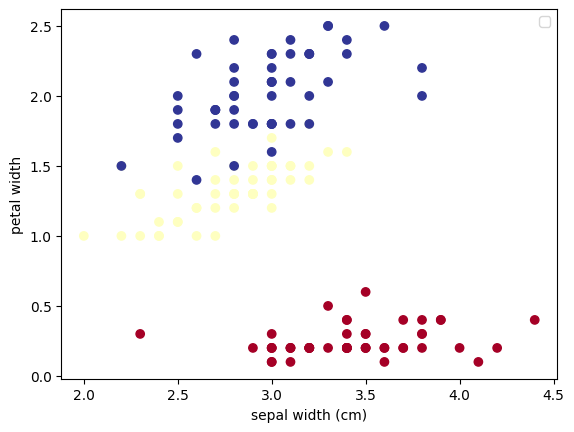

In [14]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")
plt.legend()

# SOFTMAX REGRESSION

In [16]:
#creat the model
lr = LogisticRegression(random_state = 0).fit(x,y)

In [17]:
#generate the probability
probs = lr.predict_proba(x)

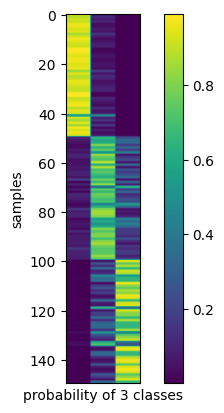

In [18]:
#plot the probability to each class
plot_probability_array(x,probs)

In [19]:
#the output for the first sample
probs[0,:]

array([9.57671606e-01, 4.22321095e-02, 9.62845517e-05])

In [20]:
#sums it to one
probs[0,:].sum()

1.0

In [21]:
#apply the argmax function
np.argmax(probs[0,:])

0

In [23]:
#apply the argmax function to each sample
softmax_prediction=np.argmax(probs,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
#verify that sklearn does this under the hood by comparing it to the output
yhat = lr.predict(x)
accuracy_score(yhat, softmax_prediction)

1.0

# SVM

In [27]:
model = SVC(kernel = 'linear', gamma = 0.5, probability = True).fit(x,y)

#prediict
yhat = model.predict(x)

#evaluation
accuracy_score(y, yhat)

0.96

{0, 1, 2}


<ipython-input-34-151aece757b1>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, edgecolor = 'black', s = 15)


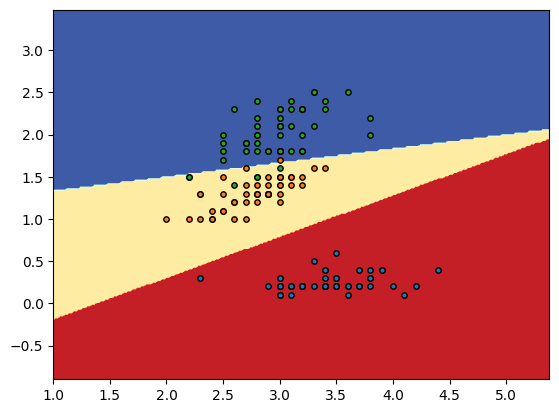

In [35]:
#plot the decision boundary
decision_boundary(x,y,model,iris)

# One VS All

{0, 1, 2}


<ipython-input-34-151aece757b1>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, edgecolor = 'black', s = 15)


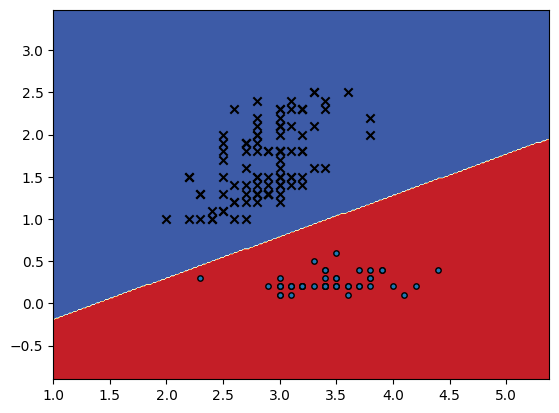

{0, 1, 2}


<ipython-input-34-151aece757b1>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, edgecolor = 'black', s = 15)


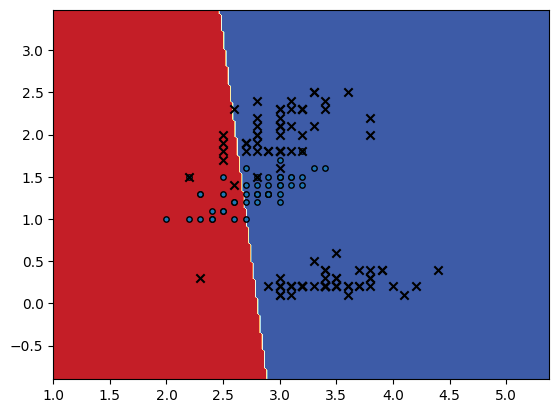

{0, 1, 2}


<ipython-input-34-151aece757b1>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, edgecolor = 'black', s = 15)


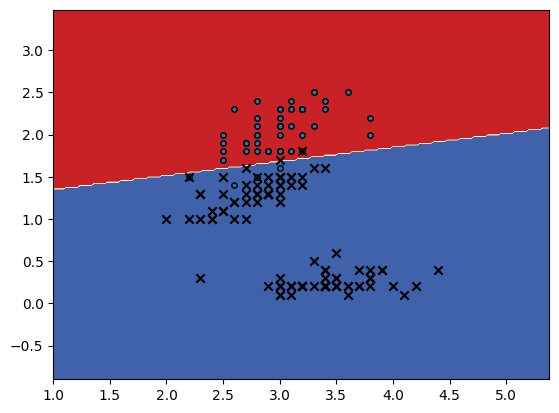

In [36]:
#train each classifier

#dummy class - artificial class
dummyClass = y.max()+1

#list used for the classifiers
myModels = []

for classs in np.unique(y):
  #select the index of our class
  select = (y==classs)
  tempY = np.zeros(y.shape)

  #class, we are tring to classify
  tempY[y==classs] = classs

  #set the other samples to a dummy class
  tempY[y!=classs] = dummyClass

  #train the model and add to list
  model = SVC(kernel = 'linear', gamma = 0.5, probability = True)
  myModels.append(model.fit(x, tempY))

  #plot the decision boundary
  decision_boundary(x, tempY, model, iris)

In [39]:
#For each sample we calculate the probability of belonging to each class
#not include the dummy one
probsArray = np.zeros((x.shape[0],3))

for j, model in enumerate(myModels):
  realClass = np.where(np.array(model.classes_) != 3)[0]
  probsArray[:,j] = model.predict_proba(x)[:, realClass][:,0]

In [40]:
#the probability of belongin to each class for the first sample
probsArray[0,:]

array([9.90726599e-01, 1.12395201e-01, 1.22240469e-11])

In [41]:
#as each the probability of belonging to the actual class
#not the dummy class, it doesnt sum to one
probsArray[0,:].sum()

1.1031218000886858

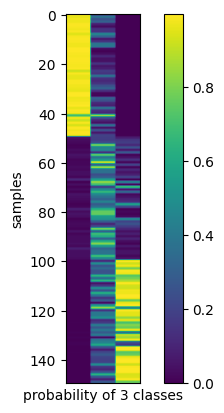

In [42]:
#we can plot the probability of belonging to the class
plot_probability_array(x, probsArray)

In [43]:
#applyu the argmax function to each sample to find the class
onevsAll = np.argmax(probsArray, axis = 1)
onevsAll

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
#calculate the accuracy
accuracy_score(y, onevsAll)

0.9466666666666667

In [49]:
#the accuracy is less than the one obtained by sklearn
#because for SVM, sklearn uses one vs one, lets verify it by comparing the outpitds
accuracy_score(onevsAll, yhat)

0.9733333333333334

# ONE VS ONE

In [50]:
#list the class
classes_=set(np.unique(y))
classes_

{0, 1, 2}

In [51]:
#determine the number of classifiers
K=len(classes_)
K*(K-1)/2

3.0

class 0 vs class 1 


<ipython-input-34-151aece757b1>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, s = 15)


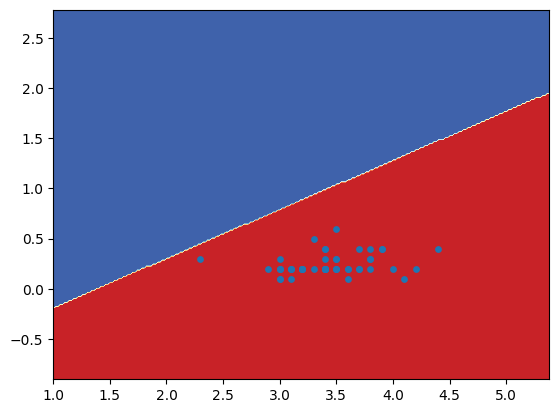

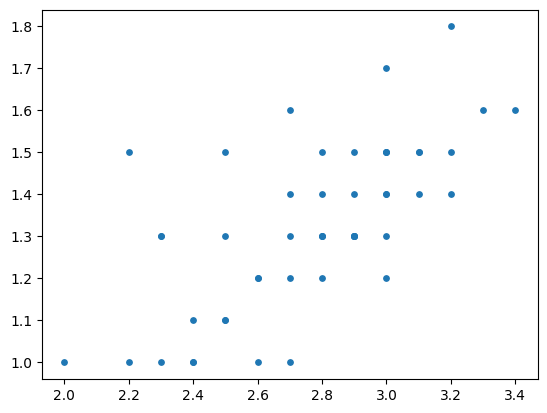

class 0 vs class 2 


<ipython-input-34-151aece757b1>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, s = 15)


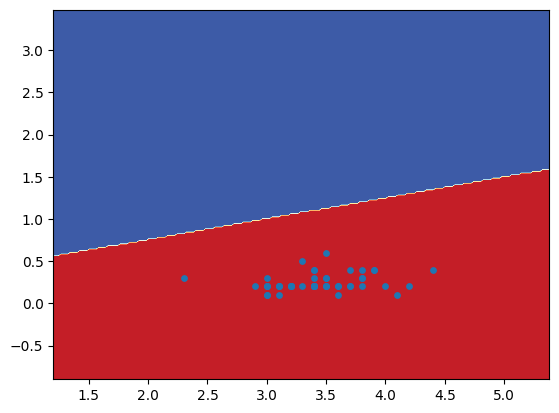

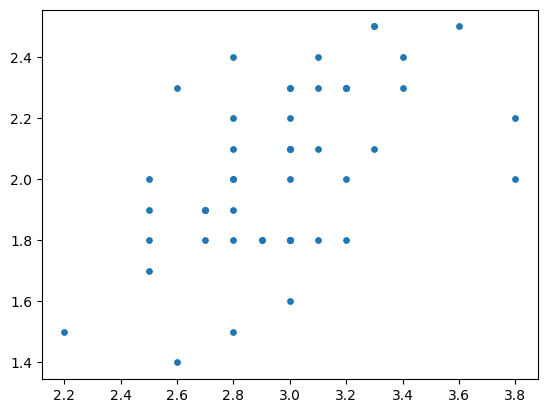

class 1 vs class 2 


<ipython-input-34-151aece757b1>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx,0], x[idx,1], label = y, cmap = plt.cm.RdYlBu, s = 15)


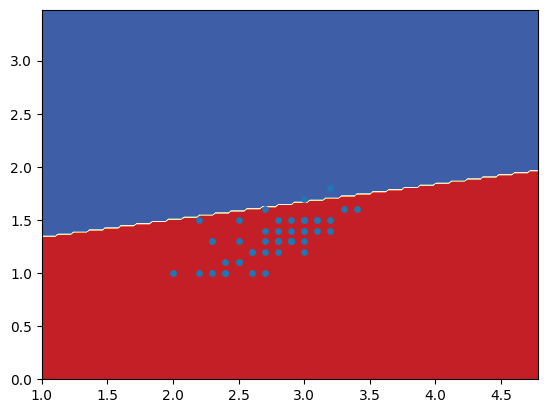

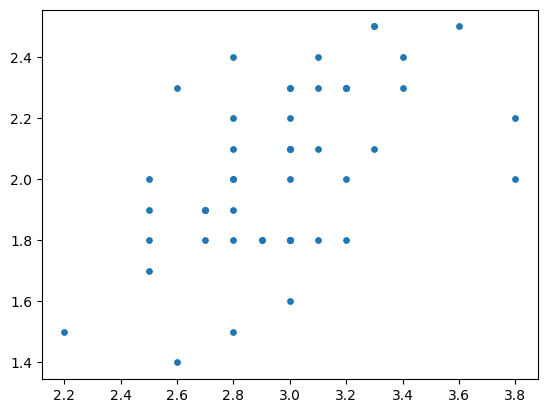

In [55]:
#train the two class classifdier on each pair of classess
pairs=[]
left_overs=classes_.copy()

#list used for classifiers
my_models=[]

#iterate through each class
for class_ in classes_:

    #remove class we have seen before
    left_overs.remove(class_)

    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(y.shape)

        #find classes in pair
        select=np.logical_or(y==class_ , y==second_class)

        #train model
        model=SVC(kernel='linear', gamma=.5, probability=True)
        model.fit(x[select,:],y[select])
        my_models.append(model)

        #Plot decision boundary for each pair and corresponding Training samples.
        decision_boundary (x[select,:],y[select],model,iris,two=True)




In [59]:
pairs

['0 and 1', '0 and 2', '1 and 2']

In [58]:
#as we can see, the data is left-skewed, containing more 5 star reviews
#here, we are plotting the distribution of text length
pairs
majority_vote_array=np.zeros((x.shape[0],3))
majority_vote_dict={}
for j,(model,pair) in enumerate(zip(my_models,pairs)):

    majority_vote_dict[pair]=model.predict(x)
    majority_vote_array[:,j]=model.predict(x)

In [60]:
#in the following table, each column is the output of a classifier for each pair of classess
#and the output is prediction
pd.DataFrame(majority_vote_dict).head(10)


,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [61]:
#to perform classification on a sample, we perform a majority vote
#that is, select the class with the most predictions
one_vs_one=np.array([np.bincount(sample.astype(int)).argmax() for sample  in majority_vote_array])
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
#calculate the accuracy
accuracy_score(y, one_vs_one)

0.96

In [63]:
#compare to sklearn
accuracy_score(yhat, one_vs_one)

1.0